In [ ]:
import numpy as np

class QuantumRegister():
    def __init__(self, num_qubits: int):
        self.num_qubits = num_qubits
        self.state_vector = np.zeros(shape=(2**num_qubits), dtype=np.complex128)
        self.state_vector[0] = 1.0 # Set the initial state to |0>
    
    def __str__(self):
        output = ""
        for i, amplitude in enumerate(self.state_vector):
            if abs(amplitude) > 1e-14:
                output += f"|{i:0{self.num_qubits}b}>: {amplitude}\n"
        return output
    '''
    def apply_gate(self, gate_matrix, target_qubits):
        num_target_qubits = len(target_qubits)
        if gate_matrix.shape != (2**num_target_qubits, 2**num_target_qubits):
            raise ValueError(f"Gate matrix shape {gate_matrix.shape} does not match the number of target qubits ({num_target_qubits})")
        full_gate_matrix = np.eye(1)
        for qubit_idx in range(self.num_qubits):
            if qubit_idx in target_qubits:
                full_gate_matrix = np.kron(full_gate_matrix, gate_matrix)
            else:
                full_gate_matrix = np.kron(full_gate_matrix, np.eye(2))
        self.state_vector = np.dot(full_gate_matrix, self.state_vector)
    
    def apply_gate(self, gate_matrix, target_qubits):
        num_target_qubits = len(target_qubits)
        if gate_matrix.shape != (2**num_target_qubits, 2**num_target_qubits):
            raise ValueError(f"Gate matrix shape {gate_matrix.shape} does not match the number of target qubits ({num_target_qubits})")
        gate_indices = [2**(self.num_qubits - qubit_idx - 1) for qubit_idx in target_qubits]
        full_gate_matrix = np.eye(2**self.num_qubits)
        for i in range(2**num_target_qubits):
            full_gate_matrix[gate_indices[0]*i:gate_indices[0]*(i+1), gate_indices[1]*i:gate_indices[1]*(i+1)] = gate_matrix
        self.state_vector = np.dot(full_gate_matrix, self.state_vector)
        
    def apply_gate(self, gate_matrix, target_qubits):
        num_target_qubits = len(target_qubits)
        if gate_matrix.shape != (2**num_target_qubits, 2**num_target_qubits):
            raise ValueError(f"Gate matrix shape {gate_matrix.shape} does not match the number of target qubits ({num_target_qubits})")
        if any(qubit_idx >= self.num_qubits for qubit_idx in target_qubits):
            raise ValueError("One or more target qubits are out of range")
        gate_indices = [2**(self.num_qubits - qubit_idx - 1) for qubit_idx in target_qubits]
        full_gate_matrix = np.eye(2**self.num_qubits)
        for i in range(2**num_target_qubits):
            full_gate_matrix[gate_indices[0]*i:gate_indices[0]*(i+1), gate_indices[1]*i:gate_indices[1]*(i+1)] = gate_matrix
        self.state_vector = np.dot(full_gate_matrix, self.state_vector)'''

    def apply_gate(self, gate_matrix, target_qubits):
        num_target_qubits = len(target_qubits)
        if gate_matrix.shape != (2**num_target_qubits, 2**num_target_qubits):
            raise ValueError(f"Gate matrix shape {gate_matrix.shape} does not match the number of target qubits ({num_target_qubits})")
        gate_indices = [2**(qubit_idx) for qubit_idx in target_qubits]
        full_gate_matrix = np.eye(2**self.num_qubits)
        for i in range(2**num_target_qubits):
            full_gate_matrix[gate_indices[0]*i:gate_indices[0]*(i+1), gate_indices[1]*i:gate_indices[1]*(i+1)] = gate_matrix
        self.state_vector = np.dot(full_gate_matrix, self.state_vector)    
    



    def measure(self):
        probabilities = np.abs(self.state_vector)**2
        outcome = np.random.choice(range(len(probabilities)), p=probabilities)
        self.state_vector = np.zeros_like(self.state_vector)
        self.state_vector[outcome] = 1.0
        return outcome


In [ ]:
# Create a 2-qubit quantum register
qr = QuantumRegister(2)

# Apply a Hadamard gate to the first qubit
H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])
qr.apply_gate(H, [0])

# Apply a CNOT gate with the first qubit as the control and the second qubit as the target
CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
qr.apply_gate(CNOT, [0, 1])

# Measure the state of the quantum register
result = qr.measure()
print(f"Measured state: {result:b}")


IndexError: list index out of range

In [ ]:
import numpy as np

class QuantumSimulator:
    def __init__(self, num_qubits):
        self.num_qubits = num_qubits
        self.state = np.zeros(shape=(2**num_qubits,), dtype=np.complex128)
        self.state[0] = 1.0  # initialize to |0> state

    def apply_gate(self, gate_matrix, target_qubits):
        # check gate_matrix dimensions
        num_target_qubits = len(target_qubits)
        if gate_matrix.shape != (2**num_target_qubits, 2**num_target_qubits):
            raise ValueError(f"Gate matrix shape {gate_matrix.shape} does not match the number of target qubits ({num_target_qubits})")

        # compute target qubit indices in state vector
        target_qubits_idx = [2**(self.num_qubits - idx - 1) for idx in target_qubits]

        # create matrix for gate and identity for non-target qubits
        full_gate_matrix = np.eye(2**self.num_qubits)
        for i in range(2**num_target_qubits):
            gate_matrix_idx = np.reshape(gate_matrix[:, i], (2**num_target_qubits, 1))
            matrix_block = np.kron(gate_matrix_idx, np.eye(2**(self.num_qubits - num_target_qubits)))
            full_gate_matrix[target_qubits_idx[0]*i:target_qubits_idx[0]*(i+1), target_qubits_idx[1]*i:target_qubits_idx[1]*(i+1)] = matrix_block

        # apply gate
        self.state = np.dot(full_gate_matrix, self.state)

    def measure(self):
        # compute probabilities from state vector
        probabilities = np.abs(self.state)**2
        outcome = np.random.choice(range(len(probabilities)), p=probabilities)

        # update state vector to collapsed state
        new_state = np.zeros_like(self.state)
        new_state[outcome] = 1.0
        self.state = new_state

        # return outcome
        return outcome

    def __str__(self):
        output = ""
        for i, amplitude in enumerate(self.state):
            if abs(amplitude) > 1e-14:
                output += f"|{i:0{self.num_qubits}b}>: {amplitude}\n"
        return output


In [ ]:
# Create a quantum register with 3 qubits
qreg = QuantumRegister(3)

# Print the initial state of the quantum register
print(qreg)

# Apply the Hadamard gate to the first qubit
h_gate = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
qreg.apply_gate(h_gate, [0])
print(qreg)

# Apply the CNOT gate to the first and second qubits
cx_gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
qreg.apply_gate(cx_gate, [0, 1])
print(qreg)

# Measure the quantum register and print the outcome
outcome = qreg.measure()
print(f"Outcome: {outcome}")
print(qreg)


|000>: (1+0j)



IndexError: list index out of range

In [57]:
import numpy as np

# Define gate matrices
I = np.identity(2)
H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, 1j], [-1j, 0]])
Z = np.array([[1, 0], [0, -1]])
S = np.array([[1, 0], [0, np.exp(1j * np.pi / 2)]])
T = np.array([[1, 0], [0, np.exp(1j * np.pi / 4)]])

def get_ground_state(num_qubits):
    """Returns a vector in the ground state representing |0>."""
    return np.array([1] + [0] * (2**num_qubits - 1))

def get_single_qubit_operator(total_qubits, gate, target):
    """Returns a matrix operator of size 2^n x 2^n for the given gate on the given target qubit."""
    operator = gate if target == 0 else I
    for qubit in range(1, total_qubits):
        operator = np.kron(operator, gate if qubit == target else I)
    return operator

def get_cx_operator(total_qubits, control, target):
    """Returns a matrix operator of CNOT of size 2^n x 2^n."""
    P0x0 = np.array([[1, 0], [0, 0]])
    P1x1 = np.array([[0, 0], [0, 1]])

    operator1 = P0x0 if control == 0 else I
    for qubit in range(1, total_qubits):
        operator1 = np.kron(operator1, P0x0 if qubit == control else I)

    operator2 = P1x1 if control == 0 else I
    for qubit in range(1, total_qubits):
        operator2 = np.kron(operator2, P1x1 if qubit == control or qubit == target else I)
    operator2 = np.kron(operator2, X)

    return operator1 + operator2

def get_operator(total_qubits, gate_unitary, target_qubits):
    """Returns a matrix operator of size 2^n x 2^n for the given gate and target qubits."""
    if gate_unitary == 'cx':
        return get_cx_operator(total_qubits, *target_qubits)
    else:
        return get_single_qubit_operator(total_qubits, globals()[gate_unitary.upper()], target_qubits[0])

def run_program(initial_state, program):
    """Builds and runs the quantum circuit."""
    total_qubits = int(np.log2(len(initial_state)))
    state = initial_state.copy()
    for gate in program:
        operator = get_operator(total_qubits, gate['gate'], gate['target'])
        state = operator @ state
    return state


In [ ]:
def measure_all(state):
    """Measures all qubits in the computational basis."""
    probabilities = np.abs(state) ** 2
    outcome = np.random.choice(len(state), p=probabilities)
    state = np.zeros_like(state)
    state[outcome] = 1
    return state



initial_state = get_ground_state(2)
program = [
{'gate': 'h', 'target': [0]},
{'gate': 'cx', 'target': [0, 1]},
{'gate': 'x', 'target': [1]}
]


final_state = run_program(initial_state, program)
measurement = measure_all(final_state)


print("Initial state: ", initial_state)
print("Final state: ", final_state)
print("Measurement outcome: ", measurement)

ValueError: operands could not be broadcast together with shapes (4,4) (8,8) 

# NEW

In [2]:

import numpy as np
import json
from collections import Counter
import matplotlib.pyplot as plt

     

import numpy as np

gates = {
    "i": np.identity(2),
    "h": np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]]),
    "x": np.array([[0, 1], [1, 0]]),
    "y": np.array([[0, +1j], [-1j, 0]]),
    "z": np.array([[1, 0], [0, -1]]),
    "s": np.array([[1, 0], [0, np.exp(np.pi * 1j / 2)]]),
    "t": np.array([[1, 0], [0, np.exp(np.pi * 1j / 4)]]),
}




In [3]:


def get_ground_state(num_qubits):
    """Returns a vector in the ground state representing |0>."""
    return np.array([1] + [0] * (2**num_qubits - 1))

def get_single_qubit_operator(total_qubits, gate, target):
    """Returns a matrix operator of size 2^n x 2^n for the given gate on the given target qubit."""
    operator = gate if target == 0 else gates['i']
    for qubit in range(1, total_qubits):
        operator = np.kron(operator, gate if qubit == target else gates['i'])
    return operator

def get_cx_operator(total_qubits, control, target):
    """Returns a matrix operator of CNOT of size 2^n x 2^n."""
    P0x0 = np.array([[1, 0], [0, 0]])
    P1x1 = np.array([[0, 0], [0, 1]])
    X = gates['x']


    operator1 = P0x0 if control == 0 else gates['i']
    for qubit in range(1, total_qubits):
        operator1 = np.kron(operator1, P0x0 if qubit == control else gates['i'])

    operator2 = P1x1 if control == 0 else gates['i'][:2, :2]
    for qubit in range(1, total_qubits):
        if qubit == control:
            operator2 = np.kron(operator2, P1x1)
        elif qubit == target:
            operator2 = np.kron(operator2, X)
        else:
            operator2 = np.kron(operator2, gates['i'][:2, :2])

    return operator1 + operator2
    
def get_operator(total_qubits, gate_unitary, target_qubits):
    """Returns a matrix operator of size 2^n x 2^n for the given gate and target qubits."""
    if gate_unitary == 'cx':
        return get_cx_operator(total_qubits, *target_qubits)
    else:
        return get_single_qubit_operator(total_qubits, gates[gate_unitary], target_qubits[0])

def run_program(initial_state, program):
    """Builds and runs the quantum circuit."""
    total_qubits = int(np.log2(len(initial_state)))
    state = initial_state.copy()
    for gate in program:
        operator = get_operator(total_qubits, gate['gate'], gate['target'])
        state = operator @ state
    return state


In [4]:

def measure_all(state_vector):
    """
    Measures qubits by taking them from |+> and |-> basis to the computational basis 
    @param state_vector: a state vector of n-qubits that are to be measured  
    @return: index (or position) of the quantum state measured
    """
    # choose element from state_vector using weighted random and return it's index
    probabilities = np.abs(state_vector)**2
    index = np.random.choice(a=len(state_vector), p=probabilities)

    return index


def get_counts(state_vector, num_shots):
    """
    Executes quantum circuit num_shots times and return the probability distribution of each output through a dictionary 
    @param state_vector: a state vector of n-qubits
    @param num_shots: number of times that the program is executes  
    @return: dictionary containing the output state and its frequency
    """
    # simply execute measure_all in a loop num_shots times and
    # return object with statistics in following form:
    #   {
    #      element_index: number_of_ocurrences,
    #      element_index: number_of_ocurrences,
    #      element_index: number_of_ocurrences,
    #      ...
    #   }
    # (only for elements which occoured - returned from measure_all)

    results = []
    
    num_bits = int(np.log2(len(state_vector)))
    

    for _ in range(num_shots):
        result = measure_all(state_vector)
        results.append("{0:b}".format(result).zfill(num_bits)[::-1]) 

    stats = Counter(results)   

    #return json.dumps(stats, sort_keys=True, indent=4)
    return stats


def plot_histogram(counts):
    """
    Plots histogram of counts
    @param counts: dictionary containing output state and its frequency
    """

    import matplotlib.pyplot as plt



    labels, values = zip(*counts.items())

    indexes = range(len(labels))
    width = 0.7

    fig, ax = plt.subplots()

    bars = ax.bar(indexes, values, width)
    ax.set_xticks(indexes)
    ax.set_xticklabels(labels)
    ax.set_xlabel('measurements')
    ax.set_ylabel('counts')

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
    plt.show()


Counter({'0000000011': 785, '0000000000': 730})


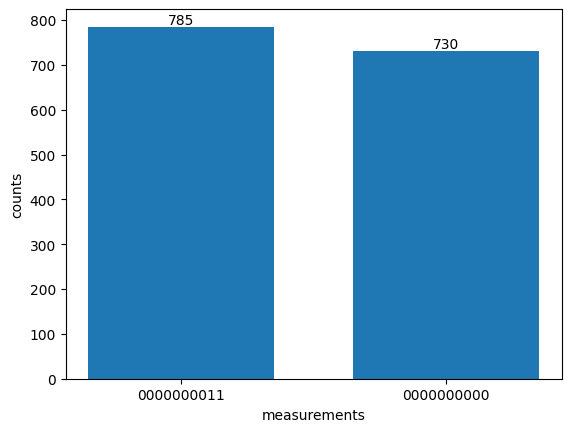

In [8]:

# Define program:

my_circuit = [
{ "gate": "h", "target": [0] }, 
{ "gate": "cx", "target": [0, 1] },

#{ "gate": "cx", "target": [2, 0] },
#{"gate": "x", "target": [2]}
]


# Create "quantum computer" with 2 qubits (this is actually just a vector :) )
my_qpu = get_ground_state(10)

# Run circuit
final_state = run_program(my_qpu, my_circuit)

# Read results
counts = get_counts(final_state, 1515)
print(counts)
plot_histogram(counts)
#visualize_counts(counts)


In [44]:
'''
import matplotlib.pyplot as plt
def plot_histogram(counts):


    labels, values = zip(*counts.items())

    indexes = np.arange(len(labels))
    width = 0.5

    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)
    #plt.xticks(list(counts.keys()))
    plt.xlabel('measurements')
    plt.ylabel('counts')

    
    plt.show()
    '''

In [46]:
# Define program:
''''
my_circuit = [
{ "gate": "h", "target": [0] }, 
{ "gate": "cx", "target": [0, 1] },

{ "gate": "cx", "target": [2, 0] },
{"gate": "x", "target": [2]}
]


# Create "quantum computer" with 2 qubits (this is actually just a vector :) )
my_qpu = get_ground_state(5)

# Run circuit
final_state = run_program(my_qpu, my_circuit)

# Read results
counts = get_counts(final_state, 1515)
print(counts)
plot_histogram(counts)
#visualize_counts(counts)'''


'\'\nmy_circuit = [\n{ "gate": "h", "target": [0] }, \n{ "gate": "cx", "target": [0, 1] },\n\n{ "gate": "cx", "target": [2, 0] },\n{"gate": "x", "target": [2]}\n]\n\n\n# Create "quantum computer" with 2 qubits (this is actually just a vector :) )\nmy_qpu = get_ground_state(5)\n\n# Run circuit\nfinal_state = run_program(my_qpu, my_circuit)\n\n# Read results\ncounts = get_counts(final_state, 1515)\nprint(counts)\nplot_histogram(counts)\n#visualize_counts(counts)'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6ee82a5a-1fab-4d5f-b750-e032eca48740' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>